# Seção 1: Importação das Bibliotecas

In [10]:
import tensorflow as tf
display(tf.__version__)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'2.12.0'

# Seção 2: Importação da Base de Dados

In [11]:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop=True, inplace=True)

FileNotFoundError: ignored

In [ ]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Seção 3: Visualização da Base de Dados

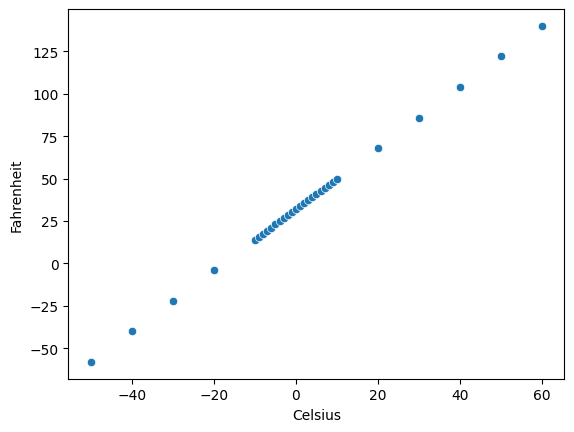

In [ ]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit']);

# Seção 4: Configuração da Base de Dados de Treinamento

In [ ]:
x_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [ ]:
x_train.shape, y_train.shape

((30,), (30,))

# Seção 5: Construção e Treinamento do Modelo

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 627ms/step - loss: 1.7905
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 5.2684
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 1.5143
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 1.8078
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 2.9064
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 2.0166
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 0.7339
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 0.4762
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 1.0443
Epoch 10/500
1/1 [==============================] - 0s 17ms/step - loss: 1.2913
Epoch 11/500
1/1 [==============================] - 0s 18ms/step - loss: 0.8366
Epoch 12/500
1/1 [==============================] - 0s 21ms/step - loss: 0.2294
Epoch 13/500
1/1 [==============================

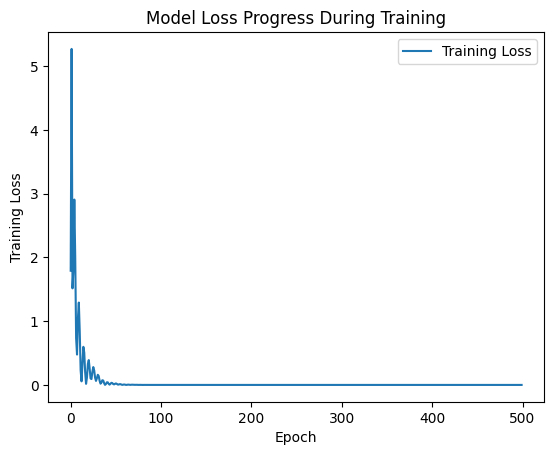

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [ ]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [ ]:
temp_c = 0
temp_f = model.predict([temp_c])
temp_f

1/1 [==============================] - 0s 56ms/step


array([[32.]], dtype=float32)